In [2]:
import pandas as pd

In [3]:
df_data = pd.read_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/df_mod_data_9clust_filtered_final.csv')

In [4]:
df_data.shape

(91412, 803)

In [4]:
# df_data = df_data.loc[df_data.rating.notnull()]
# df_data = df_data.fillna(0)

In [5]:
# df_data.shape

(91412, 811)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.utils import class_weight

In [7]:
import numpy as np

In [8]:
from sklearn import preprocessing
def min_max_normalize(df, list_columns):
    df_copy = df.copy()
    for col in list_columns:
        x = df_copy[col].values.reshape(-1, 1) #returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        df_copy[col] = pd.DataFrame(x_scaled)
    return df_copy

In [25]:
df_data = min_max_normalize(df_data, [x for x in df_data.columns[1:-3] if x not in ['recipe_id_x', 'recipe_id_y']])

C:\Users\afern\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\afern\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\afern\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\afern\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_data[[x for x in df_data.columns[1:-15] if x not in ['recipe_id_x', 'recipe_id_y']]], 
                                                    df_data[[x for x in df_data.columns[-14:-3] if x not in ['recipe_id_x', 'recipe_id_y']]], 
                                                    test_size=0.3, 
                                                    random_state=123)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(63988, 787)
(27424, 787)
(63988, 10)
(27424, 10)


In [15]:
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop

C:\Users\afern\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [59]:
from keras import backend as K 

K.clear_session()
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

adam_opt =  Adam(lr=0.0001)
sgs_opt = SGD(lr=0.001, momentum=0.9,clipvalue = 0.5)
rms_opt = RMSprop(0.0001)

model = Sequential()

model.add(Dense(300, input_dim=787, activation='relu')) #, activation='relu'
model.add(Dropout(0.4))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
# # model.add(Dense(units=21, activation='softmax'))

model.add(Dense(80, activation='relu', kernel_initializer='ones', bias_initializer='zeros', trainable=False))
model.add(Dense(60, activation='relu', kernel_initializer='ones', bias_initializer='zeros', trainable=False))

model.add(Dense(50, activation='relu')) #softmax
model.add(Dropout(0.4))

model.add(Dense(10)) #, activation='linear', activation='linear'
model.compile(loss='mse', optimizer=adam_opt)


In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               236400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               60200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 80)                8080      
__________

In [61]:
history = model.fit(X_train, y_train, epochs=6, validation_data=(X_test, y_test))#, batch_size=10)

Train on 63988 samples, validate on 27424 samples
Epoch 1/6
63988/63988 [==============================] - 15s 231us/step - loss: 6795.2036 - val_loss: 0.7276
Epoch 2/6
63988/63988 [==============================] - 17s 269us/step - loss: 48.9232 - val_loss: 0.6958
Epoch 3/6
63988/63988 [==============================] - 15s 227us/step - loss: 11.4334 - val_loss: 0.6097
Epoch 4/6
63988/63988 [==============================] - 15s 228us/step - loss: 3.6883 - val_loss: 0.4659
Epoch 5/6
63988/63988 [==============================] - 15s 231us/step - loss: 1.4179 - val_loss: 0.2962
Epoch 6/6
63988/63988 [==============================] - 15s 227us/step - loss: 0.6098 - val_loss: 0.1546


In [449]:
# history = model.fit(X_train, y_train, epochs=500, batch_size=50, validation_data=(X_test, y_test))#, class_weight=weight_the_classes(y_train))

In [32]:
import matplotlib.pyplot as plt

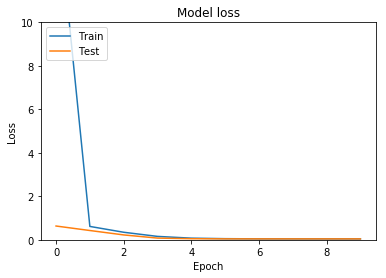

In [54]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.ylim(0, 10)
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [35]:
X_train.shape

(63988, 787)

In [36]:
X_test.shape

(27424, 787)

In [37]:
new_all_data = pd.concat([X_train, X_test])

In [38]:
new_all_data.shape

(91412, 787)

In [55]:
all_pred = model.predict(new_all_data)

In [56]:
all_pred = pd.DataFrame(all_pred)

In [41]:
df_data2 = df_data[['id']]

In [57]:
all_pred = all_pred.rename(columns={0: "rating", 1: "profile_0", 2: "profile_1", 3: "profile_2", 4: "profile_3", 5: "profile_4", 6: "profile_5", 
                 7: "profile_6", 8: "profile_7", 9: "profile_8"})

In [58]:
all_pred.describe()

,rating,profile_0,profile_1,profile_2,profile_3,profile_4,profile_5,profile_6,profile_7,profile_8
count,91412.000000,91412.000000,91412.000000,91412.000000,91412.000000,91412.000000,91412.000000,91412.000000,91412.000000,91412.000000
mean,0.965884,0.991622,0.431000,0.953134,0.942349,0.828294,0.733613,0.942486,0.955502,0.953134
std,0.000730,0.000760,0.000051,0.000117,0.000720,0.000501,0.000479,0.000455,0.000477,0.000153
min,0.965154,0.990861,0.431051,0.953251,0.941630,0.828795,0.733134,0.942031,0.955978,0.953287
25%,0.965154,0.990861,0.431051,0.953251,0.941630,0.828795,0.733134,0.942031,0.955978,0.953287
50%,0.965154,0.990861,0.431051,0.953251,0.941630,0.828795,0.733134,0.942031,0.955978,0.953287
75%,0.965154,0.990861,0.431051,0.953251,0.941630,0.828795,0.733134,0.942031,0.955978,0.953287
max,0.965154,0.990861,0.431051,0.953251,0.941630,0.828795,0.733134,0.942031,0.955978,0.953287


In [576]:
df_data2 = pd.concat([df_data2, all_pred], axis=1)

In [577]:
df_data2.sample(4)

,id,rating,profile_0,profile_1,profile_2,profile_3,profile_4,profile_5,profile_6,profile_7,profile_8
22605,160955,4.489238,4.653242,2.536094,4.578420,4.616961,4.000457,3.797541,4.614902,4.578040,4.612437
50706,65973,4.468173,4.630023,2.527503,4.577986,4.581049,3.992258,3.777905,4.588234,4.561682,4.601726
74655,32704,4.380171,4.533027,2.491615,4.576159,4.431023,3.957990,3.695894,4.476813,4.493321,4.556968
24297,51754,4.645699,4.825683,2.599896,4.581676,4.883691,4.061380,3.943356,4.812994,4.699589,4.692015


In [578]:
df_ingredients_clean = pd.read_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/df_mod_ingredients.csv')

In [579]:
df_ingredients_clean.sample(4)

,id,clean_ingredients
607710,266782,ground allspice
1728111,473267,cooked chicken
1481730,318782,butter
1977900,227409,spinach


In [581]:
df_ingredients_clean = df_ingredients_clean.groupby(['id'])['clean_ingredients'].apply(','.join).reset_index()

In [582]:
df_data3 = df_data2.merge(df_ingredients_clean, how='left')

In [588]:
df_data3.sample(3)

,id,clean_ingredients,rating,profile_0,profile_1,profile_2,profile_3,profile_4,profile_5,profile_6,profile_7,profile_8
87607,56670,"dinner roll,cream cheese,mayonnaise,dressing,b...",4.566002,4.737855,2.567400,4.580014,4.747835,4.030351,3.869089,4.712100,4.637678,4.651480
79220,92368,"chicken broth,soy sauce,cornstarch,sugar,veget...",4.559870,4.731100,2.564892,4.579878,4.737385,4.027963,3.863377,4.704349,4.632908,4.648350
72767,150527,"egg,white bread,butter",4.475216,4.637791,2.530371,4.578134,4.593056,3.994999,3.784470,4.597154,4.567155,4.605309


In [584]:
df_data3.shape

(91412, 12)

In [587]:
df_data3 = df_data3[['id', 'clean_ingredients', 'rating', 'profile_0', 'profile_1', 'profile_2', 'profile_3',
                     'profile_4', 'profile_5', 'profile_6', 'profile_7', 'profile_8']]

In [589]:
# df_data3.to_csv('C:/Users/afern/Desktop/Git/creative-cooking/data/sample_ranking.csv', index=False)

In [542]:
y_pred= model.predict(X_test)

In [543]:
df_y_pred = pd.DataFrame(y_pred)
df_y_test = pd.DataFrame(y_test)

In [544]:
df_y_test.describe()

,rating,profile_0,profile_1,profile_2,profile_3,profile_4,profile_5,profile_6,profile_7,profile_8
count,27424.000000,27424.000000,27424.000000,27424.000000,27424.000000,27424.000000,27424.000000,27424.000000,27424.000000,27424.000000
mean,4.501101,4.625325,2.554218,4.653472,4.600751,4.101076,3.773721,4.606832,4.653927,4.647961
std,0.803024,0.645605,0.372324,0.169750,0.209699,0.769872,0.164167,0.177415,0.204287,0.203009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.125000,4.500000,2.461820,4.573005,4.499150,4.026723,3.698651,4.523057,4.552202,4.546719
50%,4.833333,5.000000,2.633248,4.724434,4.678624,4.226723,3.840317,4.677819,4.741091,4.724497
75%,5.000000,5.000000,2.661820,4.753005,4.699150,4.226723,3.873651,4.706390,4.752202,4.746719
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [545]:
df_y_pred.describe()

,0,1,2,3,4,5,6,7,8,9
count,27424.000000,27424.000000,27424.000000,27424.000000,27424.000000,27424.000000,27424.000000,27424.000000,27424.000000,27424.000000
mean,4.468744,4.630665,2.527747,4.578074,4.582040,3.992491,3.778465,4.588974,4.562155,4.602015
std,0.104419,0.115092,0.042582,0.002166,0.178018,0.040658,0.097319,0.132208,0.081113,0.053103
min,4.039572,4.157613,2.352722,4.569103,3.850350,3.825372,3.378453,4.045571,4.228745,4.383760
25%,4.399472,4.554300,2.499484,4.576561,4.463930,3.965507,3.713882,4.501258,4.508315,4.566783
50%,4.464994,4.626516,2.526209,4.577920,4.575627,3.991020,3.774943,4.584205,4.559218,4.600115
75%,4.534357,4.702974,2.554491,4.579359,4.693884,4.018030,3.839596,4.672035,4.613094,4.635386
max,5.127486,5.356720,2.796374,4.591649,5.705078,4.248978,4.392400,5.423013,5.073833,4.937023


In [546]:
df_y_pred.head(10)

,0,1,2,3,4,5,6,7,8,9
0,4.406010,4.561509,2.502147,4.576694,4.475072,3.968052,3.719974,4.509532,4.513394,4.570111
1,4.567697,4.739726,2.568093,4.580039,4.750729,4.031010,3.870672,4.714251,4.638992,4.652337
2,4.438165,4.596953,2.515271,4.577359,4.529899,3.980575,3.749950,4.550246,4.538377,4.586467
3,4.372730,4.524827,2.488582,4.576007,4.418336,3.955093,3.688953,4.467388,4.487546,4.553191
4,4.419253,4.576107,2.507552,4.576966,4.497654,3.973211,3.732322,4.526305,4.523682,4.576843
5,4.329380,4.477049,2.470899,4.575108,4.344427,3.938215,3.648549,4.412508,4.453867,4.531139
6,4.965220,5.177874,2.730203,4.588290,5.428438,4.185791,4.241155,5.217551,4.947795,4.854508
7,4.517532,4.684422,2.547629,4.579015,4.665193,4.011477,3.823909,4.650733,4.600032,4.626833
8,4.494429,4.658969,2.538207,4.578528,4.625813,4.002482,3.802380,4.621483,4.582081,4.615075
9,4.553387,4.723942,2.562246,4.579753,4.726317,4.025435,3.857319,4.696119,4.627869,4.645060


In [547]:
df_y_test.head(10)

,rating,profile_0,profile_1,profile_2,profile_3,profile_4,profile_5,profile_6,profile_7,profile_8
3877,5.000000,5.000000,2.661820,4.753005,4.699150,4.226723,3.873651,4.706390,4.752202,4.746719
84522,4.666667,5.000000,2.595153,4.686338,4.632484,4.160057,3.806984,4.639724,4.000000,4.680052
23191,4.000000,4.000000,2.461820,4.553005,4.499150,4.026723,3.673651,4.506390,4.552202,4.546719
76301,5.000000,4.714067,2.661820,4.753005,4.699150,5.000000,3.873651,4.706390,4.752202,4.746719
30469,5.000000,4.714067,2.661820,4.753005,4.699150,5.000000,3.873651,4.706390,4.752202,4.746719
53477,5.000000,5.000000,2.661820,4.753005,4.699150,4.226723,3.873651,4.706390,4.752202,4.746719
87050,4.500000,4.500000,2.561820,4.653005,4.599150,4.126723,3.773651,4.606390,4.652202,4.646719
8931,3.000000,3.000000,2.261820,4.353005,4.299150,3.826723,3.473651,4.306390,4.352202,4.346719
38393,5.000000,5.000000,2.661820,4.753005,4.699150,5.000000,3.873651,4.706390,4.752202,4.746719
40422,5.000000,5.000000,2.661820,4.753005,4.699150,4.226723,3.873651,4.706390,4.752202,4.746719


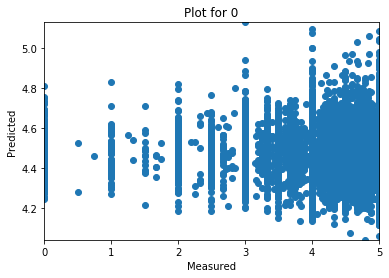

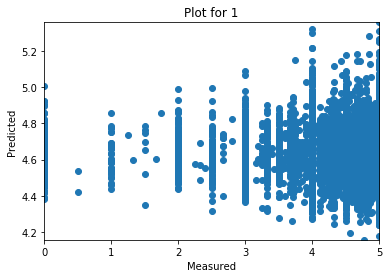

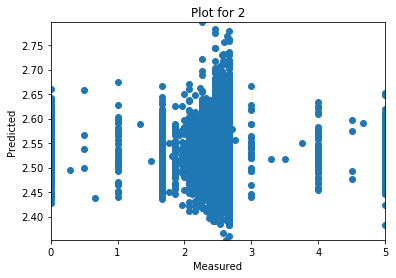

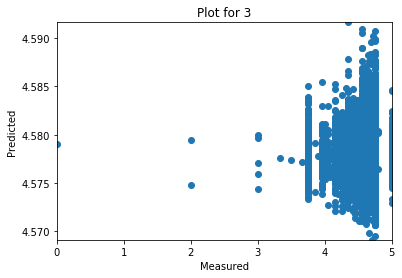

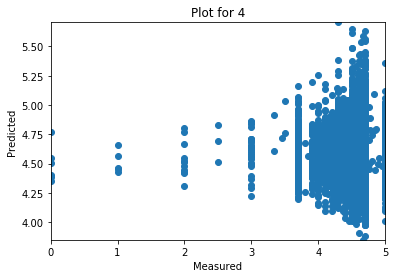

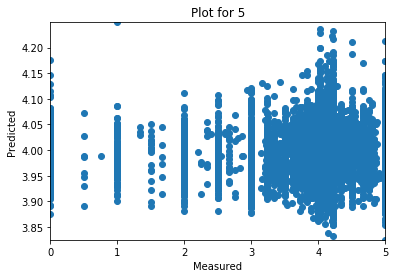

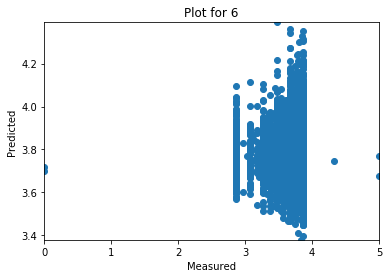

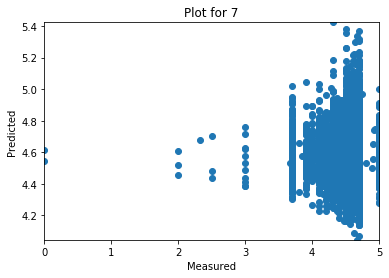

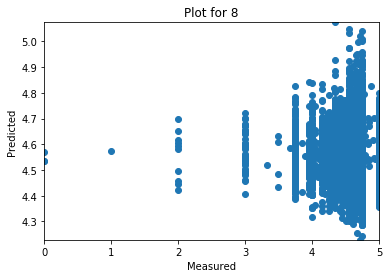

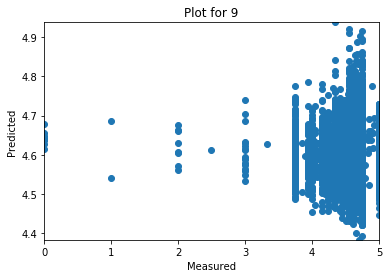

In [552]:
for i in range(10):
    my_test, my_pred = df_y_test[df_y_test.columns[i]], df_y_pred[df_y_pred.columns[i]]
    fig, ax = plt.subplots()
    ax.scatter(my_test, my_pred)
#     ax.plot([my_test.min(), my_test.max()], [my_test.min(), my_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.xlim(my_test.min(), my_test.max())
    plt.ylim(my_pred.min(), my_pred.max())
    plt.title('Plot for %s' % i)
    plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model2 = Sequential()
model2.add(Dense(units=200, activation='relu', input_dim=787))
model2.add(Dense(units=150, activation='relu'))
model2.add(Dense(units=100, activation='softmax'))
# model.add(Dense(units=21, activation='softmax'))

# model2.add(Dense(80, activation='relu', kernel_initializer='ones', bias_initializer='zeros', trainable=False))
# model2.add(Dense(60, activation='relu', kernel_initializer='ones', bias_initializer='zeros', trainable=False))

model2.add(Dense(units=50, activation='softmax'))

model2.add(Dense(10, activation='relu'))
model2.compile(loss='mse',
              optimizer='adam')

# model.train_on_batch(x_batch, y_batch)
# loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
# classes = model.predict(x_test, batch_size=128)

In [49]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from numpy import array
from numpy.random import uniform
from numpy import hstack
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [50]:
X = df_data[[x for x in df_data.columns[1:-22] if x not in ['recipe_id_x', 'recipe_id_y']]]
Y = df_data[[x for x in df_data.columns[-22:] if x not in ['recipe_id_x', 'recipe_id_y']]]

In [52]:
Y.head()

,rating,profile_0,profile_1,profile_2,profile_3,profile_4,profile_5,profile_6,profile_7,profile_8,...,profile_10,profile_11,profile_12,profile_13,profile_14,profile_15,profile_16,profile_17,profile_18,profile_19
0,5.000000,4.609172,4.07199,4.62416,4.68087,4.611646,4.651147,4.608679,5.000000,4.644744,...,0.366642,3.614765,4.6921,4.632229,5.0,4.637026,4.62348,4.61843,4.605439,4.667145
1,4.000000,4.609172,4.07199,4.62416,4.68087,4.611646,4.651147,4.608679,4.686692,4.644744,...,0.366642,3.614765,4.6921,4.632229,4.0,4.637026,4.62348,4.61843,4.605439,4.667145
2,4.666667,4.609172,4.00000,4.62416,4.68087,4.611646,4.651147,4.608679,4.686692,4.644744,...,0.366642,3.614765,4.6921,4.632229,5.0,4.637026,4.62348,4.61843,4.605439,4.667145
3,4.500000,4.609172,5.00000,4.62416,4.68087,4.611646,4.651147,4.608679,4.686692,4.644744,...,0.366642,3.614765,4.6921,4.632229,4.0,4.637026,4.62348,4.61843,4.605439,4.667145
4,5.000000,4.609172,4.07199,4.62416,4.68087,4.611646,4.651147,4.608679,4.686692,4.644744,...,0.366642,3.614765,4.6921,4.632229,5.0,4.637026,4.62348,4.61843,4.605439,4.667145


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2, 
                                                    random_state=123)

In [54]:
in_dim = X.shape[1]
out_dim = Y.shape[1]

In [56]:
out_dim

21

In [62]:
import keras as keras

In [65]:
# ADAM = keras.optimizers.Adam(learning_rate=0.01)

model = Sequential()
model.add(Dense(100, input_dim=in_dim, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(out_dim))
model.compile(loss="mse", optimizer='sgd')
 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 100)               78800     
_________________________________________________________________
dense_41 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_42 (Dense)             (None, 21)                693       
Total params: 82,725
Trainable params: 82,725
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.fit(X_train, y_train, epochs=10, batch_size=50, verbose=1)

Epoch 1/10
15888/15888 [==============================] - 3s 179us/step - loss: nan
Epoch 2/10
15888/15888 [==============================] - 2s 135us/step - loss: nan
Epoch 3/10
15888/15888 [==============================] - 1s 91us/step - loss: nan
Epoch 4/10
15888/15888 [==============================] - 1s 92us/step - loss: nan
Epoch 5/10
15888/15888 [==============================] - 1s 89us/step - loss: nan
Epoch 6/10
15888/15888 [==============================] - 1s 73us/step - loss: nan
Epoch 7/10
15888/15888 [==============================] - 1s 85us/step - loss: nan
Epoch 8/10
15888/15888 [==============================] - 1s 86us/step - loss: nan
Epoch 9/10
15888/15888 [==============================] - 2s 131us/step - loss: nan
Epoch 10/10
15888/15888 [==============================] - 2s 137us/step - loss: nan
